# Assignment_4 DT

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [ ]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.shape

(150, 5)

In [ ]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### It is clear that Entropy of the target will be 1 -> equal distribution amoung classes

In [ ]:
for i in range(len(df.target)):
  if df['target'][i] == 0:
    df['target'][i] = 'setosa'
  elif (i == 1):
    df['target'][i] = 'versicolor'
  else:
    df['target'][i] = 'virginica'

df

<ipython-input-58-e2edfe20ab37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][i] = 'setosa'


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Q1 Plot decision tree using export_graphviz

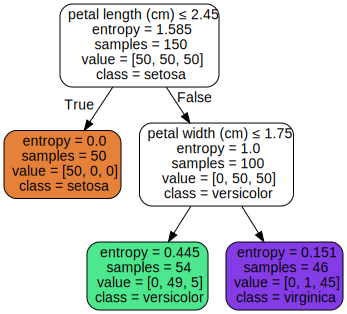

In [ ]:
# # Answer:

from graphviz import Source
from sklearn.tree import export_graphviz
# from IPython.display import Image  
# import pydotplus

features = iris.feature_names[2:]
classes = iris.target_names
dot_data = export_graphviz(tree_clf, out_file=None, 
                feature_names= features,  
                class_names= classes,
                filled=True, rounded=True,  
                special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

# Draw graph
graph = Source(dot_data, format="png") 
graph

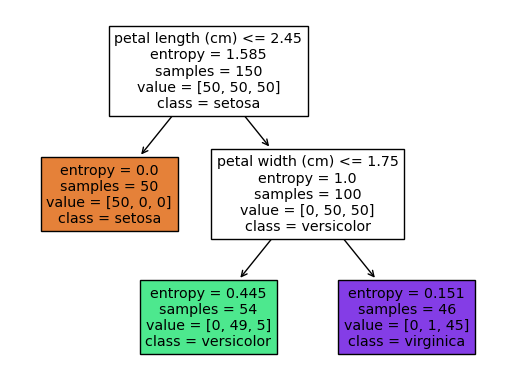

In [ ]:
# visualize using Matplotlip
from sklearn import tree
import matplotlib.pyplot as plt


Features =['petal length (cm)','petal width (cm)']
classes =['setosa', 'versicolor', 'virginica']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_clf, feature_names = Features, class_names=classes, filled = True);
# fig.savefig('imagename.png')

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

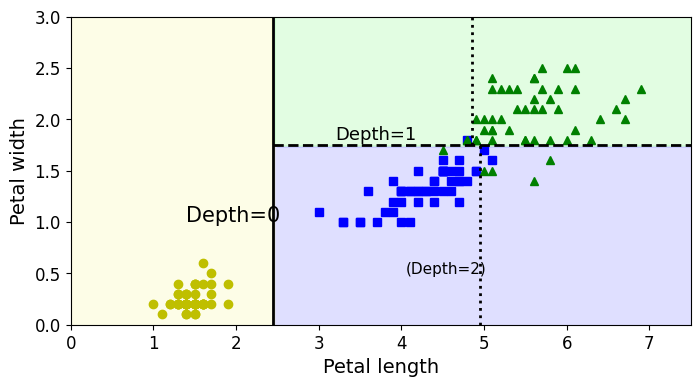

In [ ]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. The Entropy of the dataset ("petal lenght") = 1.585
   The Entropy of 
   * The true block (left one) = 0 which corresponds to similar values of the target
   * The false block (right one) = 1 which corresponds to equal values in each class of the target variable

2. The max_depth hyperparameter in decision trees controls the number of splits of tree and as the the value of max_depth increase, the model expresses the target variable better:
* max_depth=1 -> very simple model that depend on one feature which is likely to underfit the data.
* max_depth=2 -> creates better model than depth 1.
* max_depth=10 -> ten splits which creates a very complex model that express most relationships between the features and the target variable, but is may leads to overfitting.

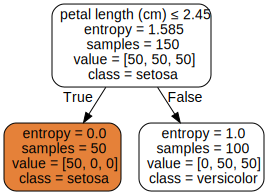

In [ ]:
####### YOUR CODE HERE
# Trianing
tree_clf1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf1.fit(X, y)
# Plotting
dot_data1 = export_graphviz(tree_clf1, out_file=None, feature_names= iris.feature_names[2:], class_names= iris.target_names, filled=True, rounded=True, special_characters=True)
Source(dot_data1, format="png") 


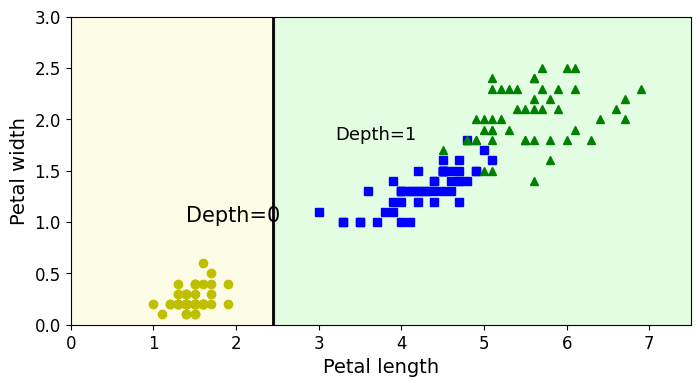

In [ ]:
# DB
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf1, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()


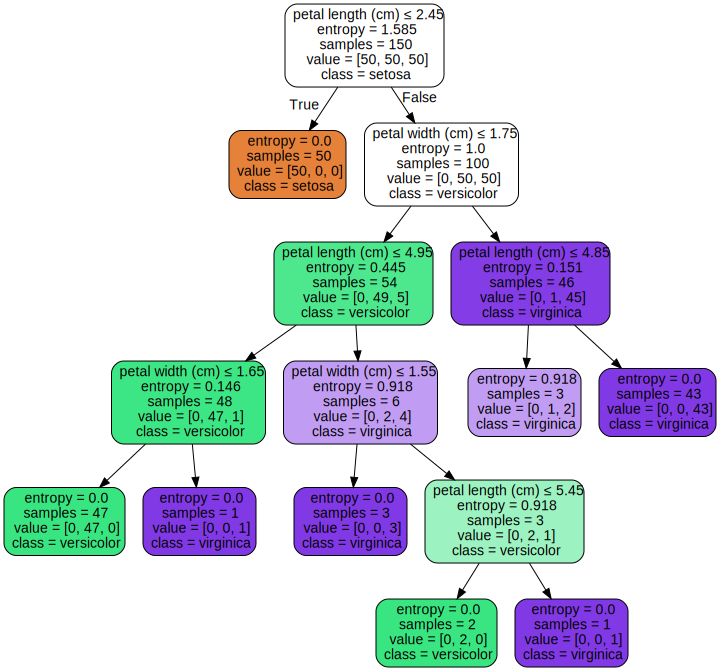

In [ ]:
# Plotting max_depth = 10
# Trianing
tree_clf10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf10.fit(X, y)
# Plotting
dot_data10 = export_graphviz(tree_clf10, out_file=None, feature_names= iris.feature_names[2:], class_names= iris.target_names, filled=True, rounded=True, special_characters=True)
Source(dot_data10, format="png") 

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. 

**Answer**
prediction:
1. from the Tree graph, 5 is greater than 2.45, so condition not satisfied leading to the right block 
2. And 1.5 is less than 1.75, so the left block leading to versicolor prediction
probability:
As the prediction is  versicolor -> total number of sample is 54 that
 includes values of (0,49,5),so the probaility of:
 * P("Stosa") = 0/54
 * P("versicolor") = 49/54 = 0.9074074074074074
 * P("virginica") = 5/54 = 0.09259259
 

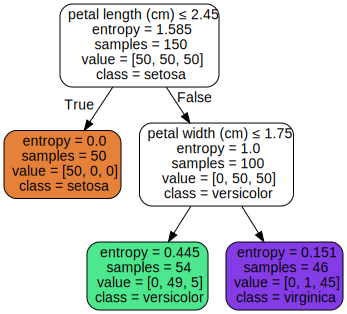

In [ ]:
dot_data = export_graphviz(tree_clf, out_file=None, feature_names= iris.feature_names[2:], class_names= iris.target_names, filled=True, rounded=True, special_characters=True)
Source(dot_data, format="png")

In [ ]:
def predict_probability(X, clf):
    # Traverse the decision tree to determine the leaf node that X belongs to
    node_indicator = clf.decision_path(X)
    leaf_id = clf.apply(X)

    # Calculate the number of data points in that leaf node that belong to each class
    n_samples = clf.tree_.n_node_samples[leaf_id]
    class_num = clf.tree_.value[leaf_id].squeeze()

    # Calculate the total number of data points in that leaf node
    sample_num = class_num.sum()

    # Divide the number of data points in each class by the total number of data points to get the probability of each class
    class_probs = class_num / sample_num
    # print(f'{class_probs}\n where')
    

    # Print the probabilities of all classes
    for i, prob in enumerate(class_probs):
        print(f"Class {i}: {prob}")

In [ ]:
######### Your code for (2.)

X_new = [[5, 1.5]]
################# probability #########################
print('The class probabilities from scratch:')
pred_prob = predict_probability(X_new, tree_clf)

############ "predict_proba" function #################
new_pred = tree_clf.predict(X_new)
print(f'\nThe data point belongs to class {new_pred[0]}')
class_probabilities = tree_clf.predict_proba(X_new)
# get the probability of each class of a certain point 
print(f'The class peobabilities:{class_probabilities}')

The class probabilities from scratch:
Class 0: 0.0
Class 1: 0.9074074074074074
Class 2: 0.09259259259259259

The data point belongs to class 1
The class peobabilities:[[0.         0.90740741 0.09259259]]


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Q3.1.1: Fit a decision tree classifier max_depth = 2, to the original data

 Q3.1.3: clasifier score on training data
The Score1 = 96.0

 Q3.1.2: Decision Boundaries


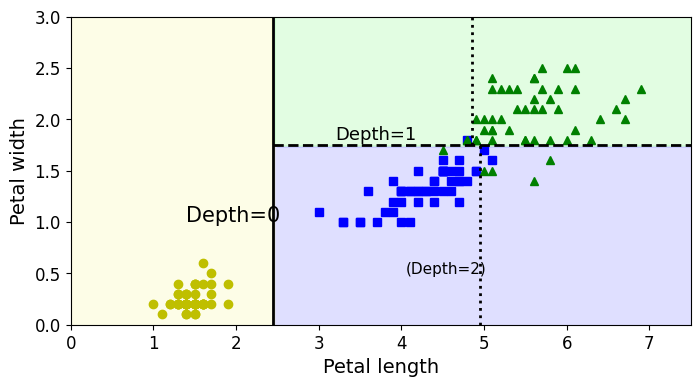

In [ ]:
##### YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_all = iris.data[:, :] # sepal length and width & petal length and width
y_all = iris.target



# Trianing
print("Q3.1.1: Fit a decision tree classifier max_depth = 2, to the original data")
dt = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
dt.fit(X_all, y_all)

# The Score
print("\n Q3.1.3: clasifier score on training data")
score_od = dt.score(X_all, y_all)*100
print(f'The Score1 = {score_od}')


# DB
dt1 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
dt1.fit(X, y)

print("\n Q3.1.2: Decision Boundaries")
plt.figure(figsize=(8, 4))
plot_decision_boundary(dt1, X, y, legend=False)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

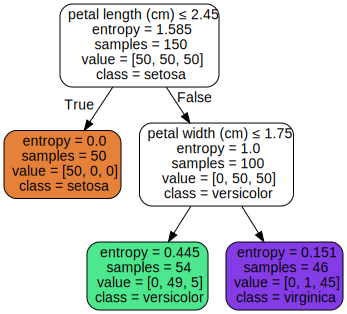

In [ ]:
# Plotting Tree
dt_data = export_graphviz(dt, out_file=None, feature_names= iris.feature_names, class_names= iris.target_names, filled=True, rounded=True, special_characters=True)
Source(dt_data, format="png") 

The following cell rotates the data by angle 20

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data


 Q3.1.3: clasifier score on training data
The Score1 = 97.33333333333334

 Q3.1.2: Decision Boundaries


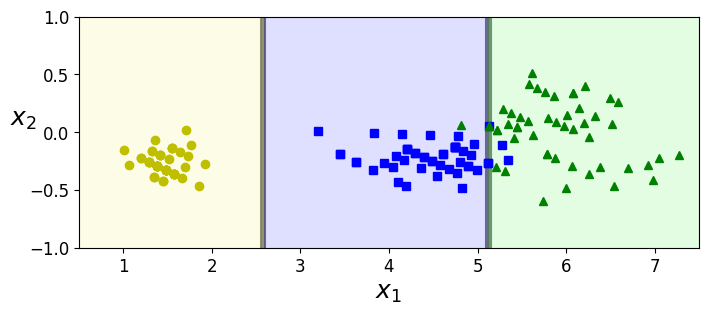

In [ ]:
##### YOUR CODE HERE

# Trianing
# print("Q3.1.1: Fit a decision tree classifier max_depth = 2, to the original data")
dtr = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
dtr.fit(Xr, y)

# The Score
print("\n Q3.1.3: clasifier score on training data")
score_od = dtr.score(Xr, y)*100
print(f'The Score1 = {score_od}')

# DB
print("\n Q3.1.2: Decision Boundaries")
plt.figure(figsize=(8, 3))
plot_decision_boundary(dtr, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()


### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [ ]:
import numpy as np
def plot_logistic_regression(clf, X, y, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data


 Q3.1.3: Lr score on training data
The Score = 96.66666666666667

 Q3.1.2: Lr Decision Boundaries


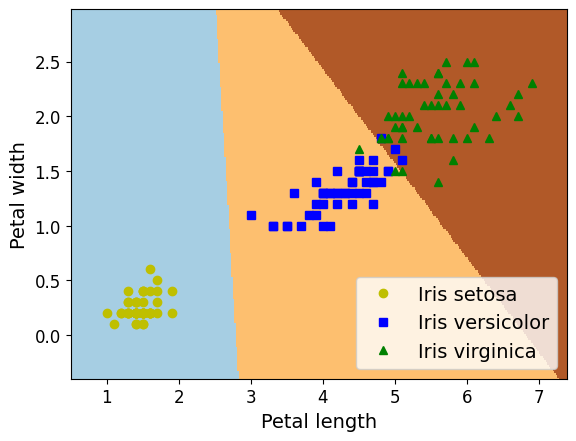

In [ ]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

# Training
# print("Q3.1.1: Fit a logistic regression classifier to the original data")
lr = LogisticRegression()
lr.fit(X, y)

# The Score
print("\n Q3.1.3: Lr score on training data")
score_lr = lr.score(X, y)*100
print(f'The Score = {score_lr}')

# DB
print("\n Q3.1.2: Lr Decision Boundaries")
plot_logistic_regression(lr, X , y,[0,7.5,0,3])

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

The Score = 96.66666666666667


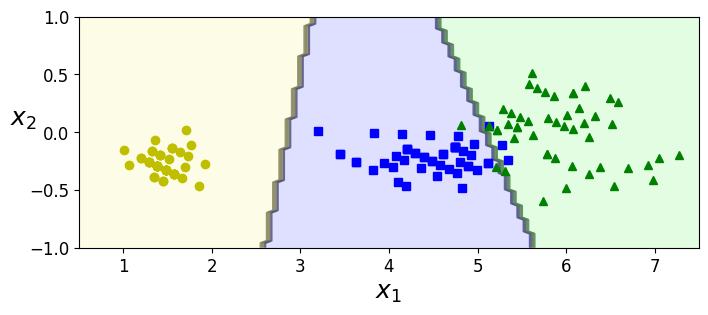

In [ ]:
###### YOUR CODE HERE
# Training
lr_rotate = LogisticRegression()
lr_rotate.fit(Xr, y)

# Score 
print(f'The Score = {lr_rotate.score(Xr,y) *100}')

# DB
plt.figure(figsize=(8, 3))
plot_decision_boundary(lr_rotate, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)
plt.show()

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. The accuracy of Logistic regression deosnt change, but the accuracy of desicion tree increased by rotation

2. the Decision boundries of the LR is linear, While decision trees are non-linear classifiers, So when the data is rotated, the decision tree captured these non-linear relationships, leading to an increase in classifier accuracy.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [ ]:
from sklearn.datasets import make_moons

# Generate the moons dataset
X, y = make_moons(n_samples=10000, noise=0.4)


2. Split it into a training set and a test set using train_test_split().

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8 , 10, 20, 30, 40],
    'max_leaf_nodes': [10, 20, 30, 40, 50, 70, 80, 100],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Create a grid search object with cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy score: {grid_search.best_score_*100}")

Best hyperparameters: {'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_split': 2}
Accuracy score: 86.1


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [ ]:
dt = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 30, min_samples_split = 2, random_state=42)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)*100

84.7

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. The resulting plot shows the original data points (in orange), and the predictions made by the two decision tree regressors with different maximum depths where it illustrates how the maximum depth of a decision tree can affect its ability to fit the data:
- Blue -> max_depth = 2 (may underfit the data)
- Green -> max_depth = 5 (may overfit the data)


2. max_depth=5 is likely to have a higher variance error as it allows to fit the training data in an extremely good way that capture complex relationships between the features and the target variable, so that make the model specific to the training data and performs bad on a new data.
3. max_depth=2 is likely to have a higher bias error as it is not able to capture relationships between the features and the target variable in a good way that creates a poor model that poorly represents the underlying patterns in the data.

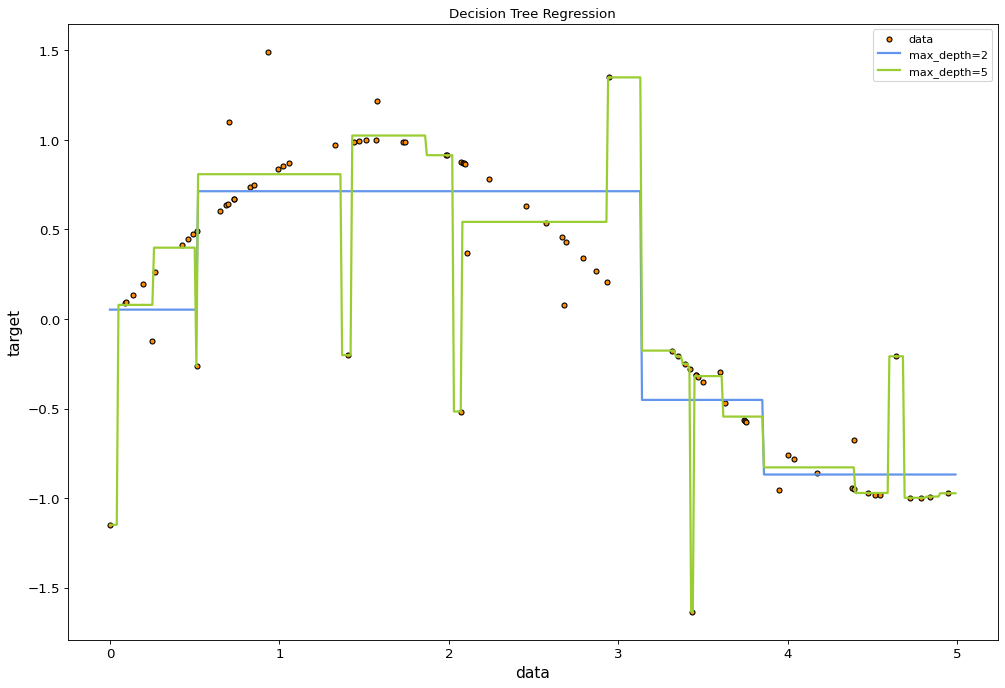

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()